In [ ]:
from periomod.base import Patient, Side, Tooth
from periomod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pocketclosure",
    encodings=["target", "one_hot"],
    learners=["xgb", "lr", "rf", "mlp"],
    tuning_methods=["holdout", "cv"],
    hpo_methods=["hebo", "rs"],
    criteria=["f1", "brier_score"],
    sampling=[None, "upsampling", "downsampling", "smote"],
    factor=2,
    n_configs=50,
    n_jobs=-1,
    path="../data/processed/processed_data.csv"
)

wrapper.baseline()

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,target,0.000000,0.000000,0.000000,0.900635,0.089518,0.500000,"[[0, 2002], [0, 18146]]",None
1,Logistic Regression,target,0.465717,0.691249,0.351149,0.919942,0.058747,0.911622,"[[703, 1299], [314, 17832]]",None
2,Random Forest,target,0.475978,0.655565,0.373626,0.918255,0.060135,0.905892,"[[748, 1254], [393, 17753]]",None
3,Dummy Classifier,one_hot,0.000000,0.000000,0.000000,0.900635,0.089518,0.500000,"[[0, 2002], [0, 18146]]",None
4,Logistic Regression,one_hot,0.474113,0.681010,0.363636,0.919843,0.058961,0.909538,"[[728, 1274], [341, 17805]]",None
5,Random Forest,one_hot,0.462040,0.664480,0.354146,0.918056,0.060440,0.901533,"[[709, 1293], [358, 17788]]",None


In [ ]:
benchmark, learners = wrapper.wrapped_benchmark()
wrapper.save_benchmark(
    benchmark_df=benchmark,
    path="..reports/pocketclosure/pocketclosure_experiments.csv"
)
wrapper.save_learners(learners_dict=learners, path="..models/pocketclosure_experiments")

,Model,Encoding,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Confusion Matrix,Best Threshold
0,Dummy Classifier,one_hot,0.000000,0.00000,0.000000,0.900635,0.089518,0.500000,"[[0, 2002], [0, 18146]]",None
1,Logistic Regression,one_hot,0.474113,0.68101,0.363636,0.919843,0.058961,0.909538,"[[728, 1274], [341, 17805]]",None
2,Random Forest,one_hot,0.462040,0.66448,0.354146,0.918056,0.060440,0.901533,"[[709, 1293], [358, 17788]]",None


In [ ]:
from periomod.wrapper import load_benchmark, load_learners

benchmark = load_benchmark(
    path="..reports/pocketclosure/pocketclosure_experiments.csv",
                           )
learners = load_learners(folder_name="..models/pocketclosure_experiments")

In [ ]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="f1",
    aggregate=True,
    path="../data/processed/processed_data.csv"
)

'target'

In [5]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,F1 Score,Precision,Recall,Accuracy,Brier Score,ROC AUC Score,Best Threshold,Confusion Matrix
0,pocketclosure,lr,f1,smote,2.0,0.5438,0.4786,0.6304,0.9024,0.1264,0.904,0.23,"[[1166, 682], [1262, 16825]]"


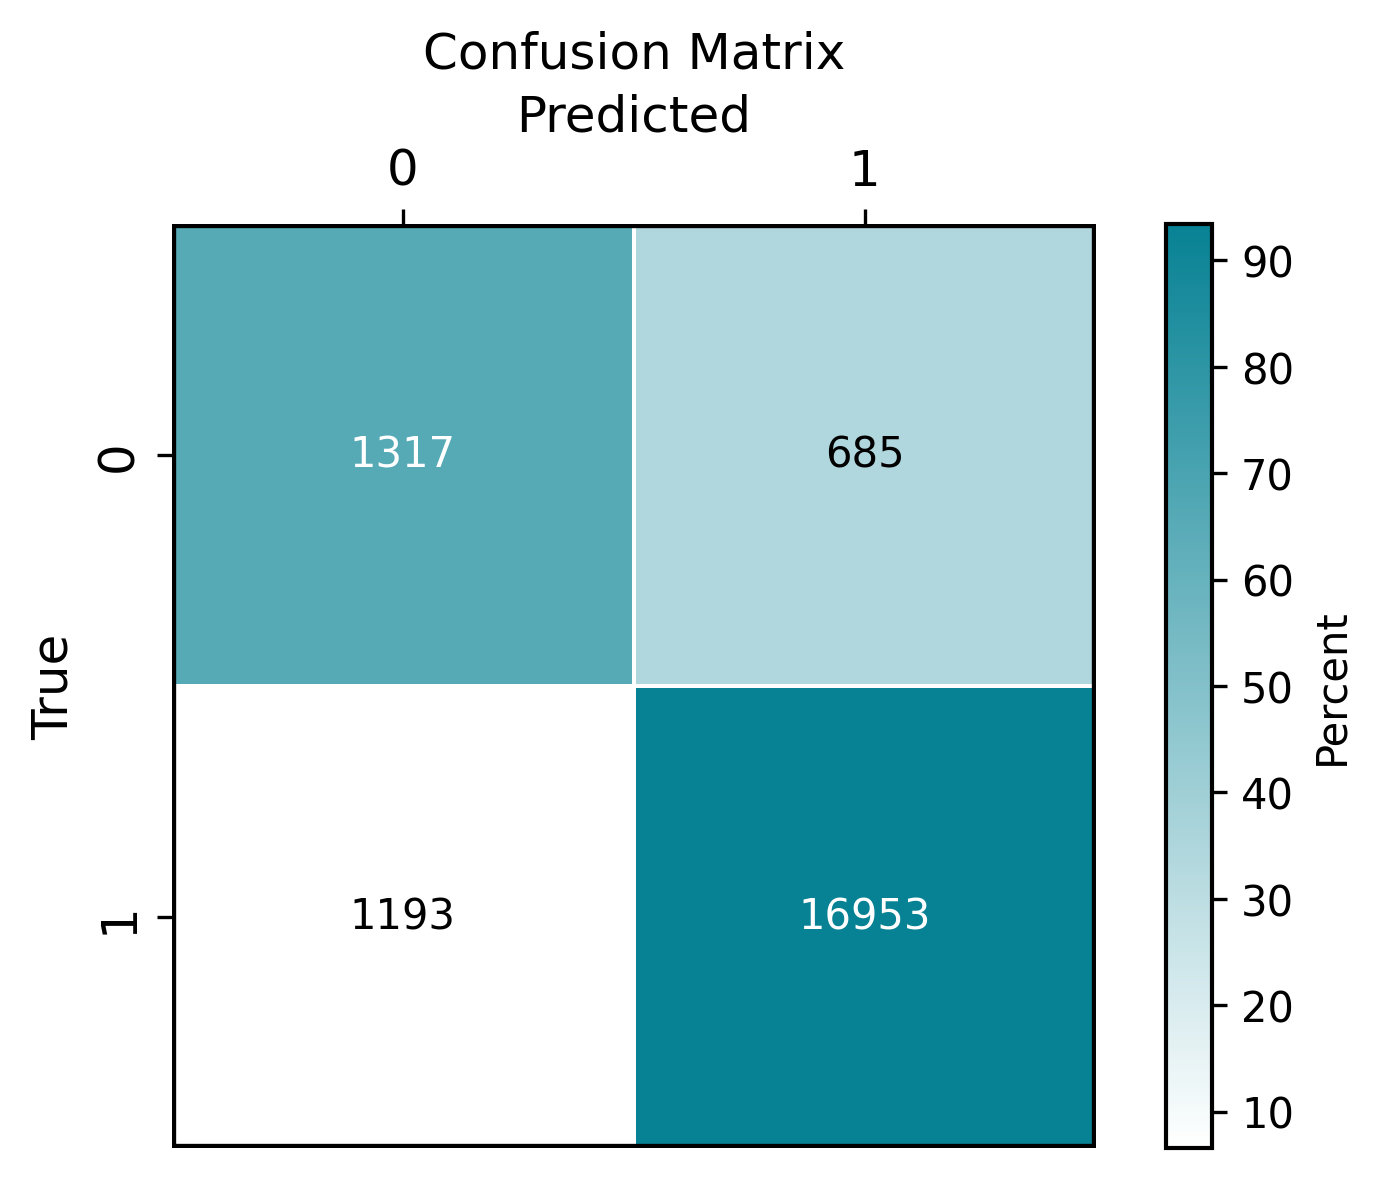

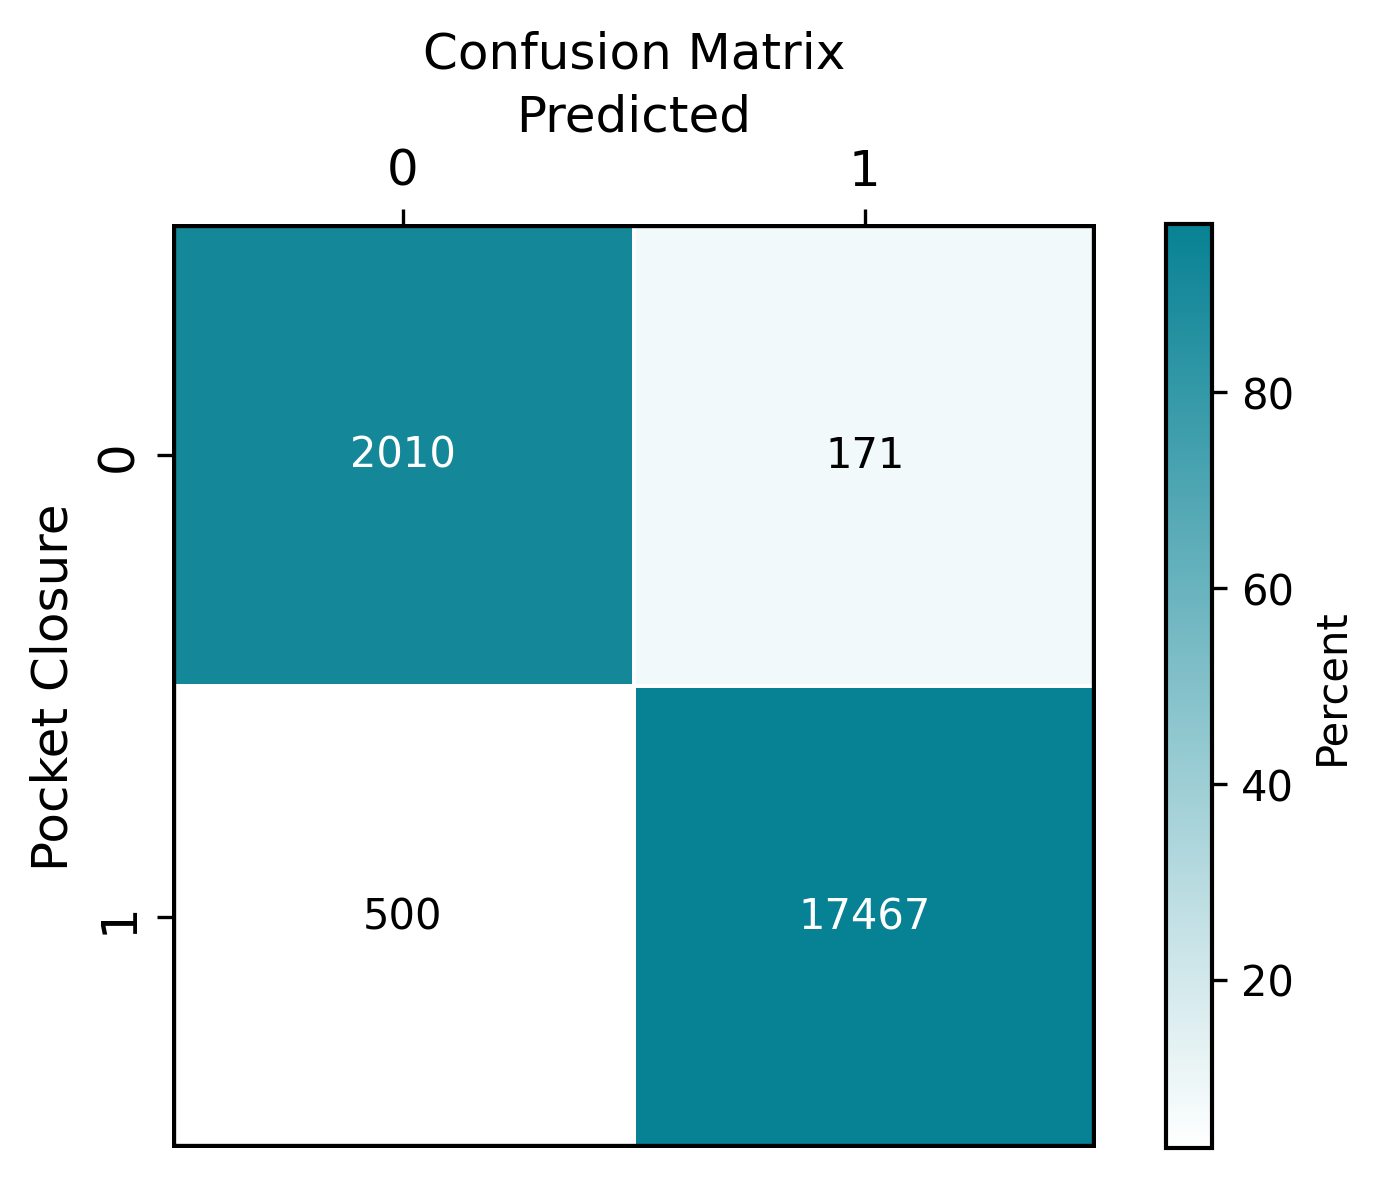

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.113881  0.016430
1  1  0.123617  0.025166


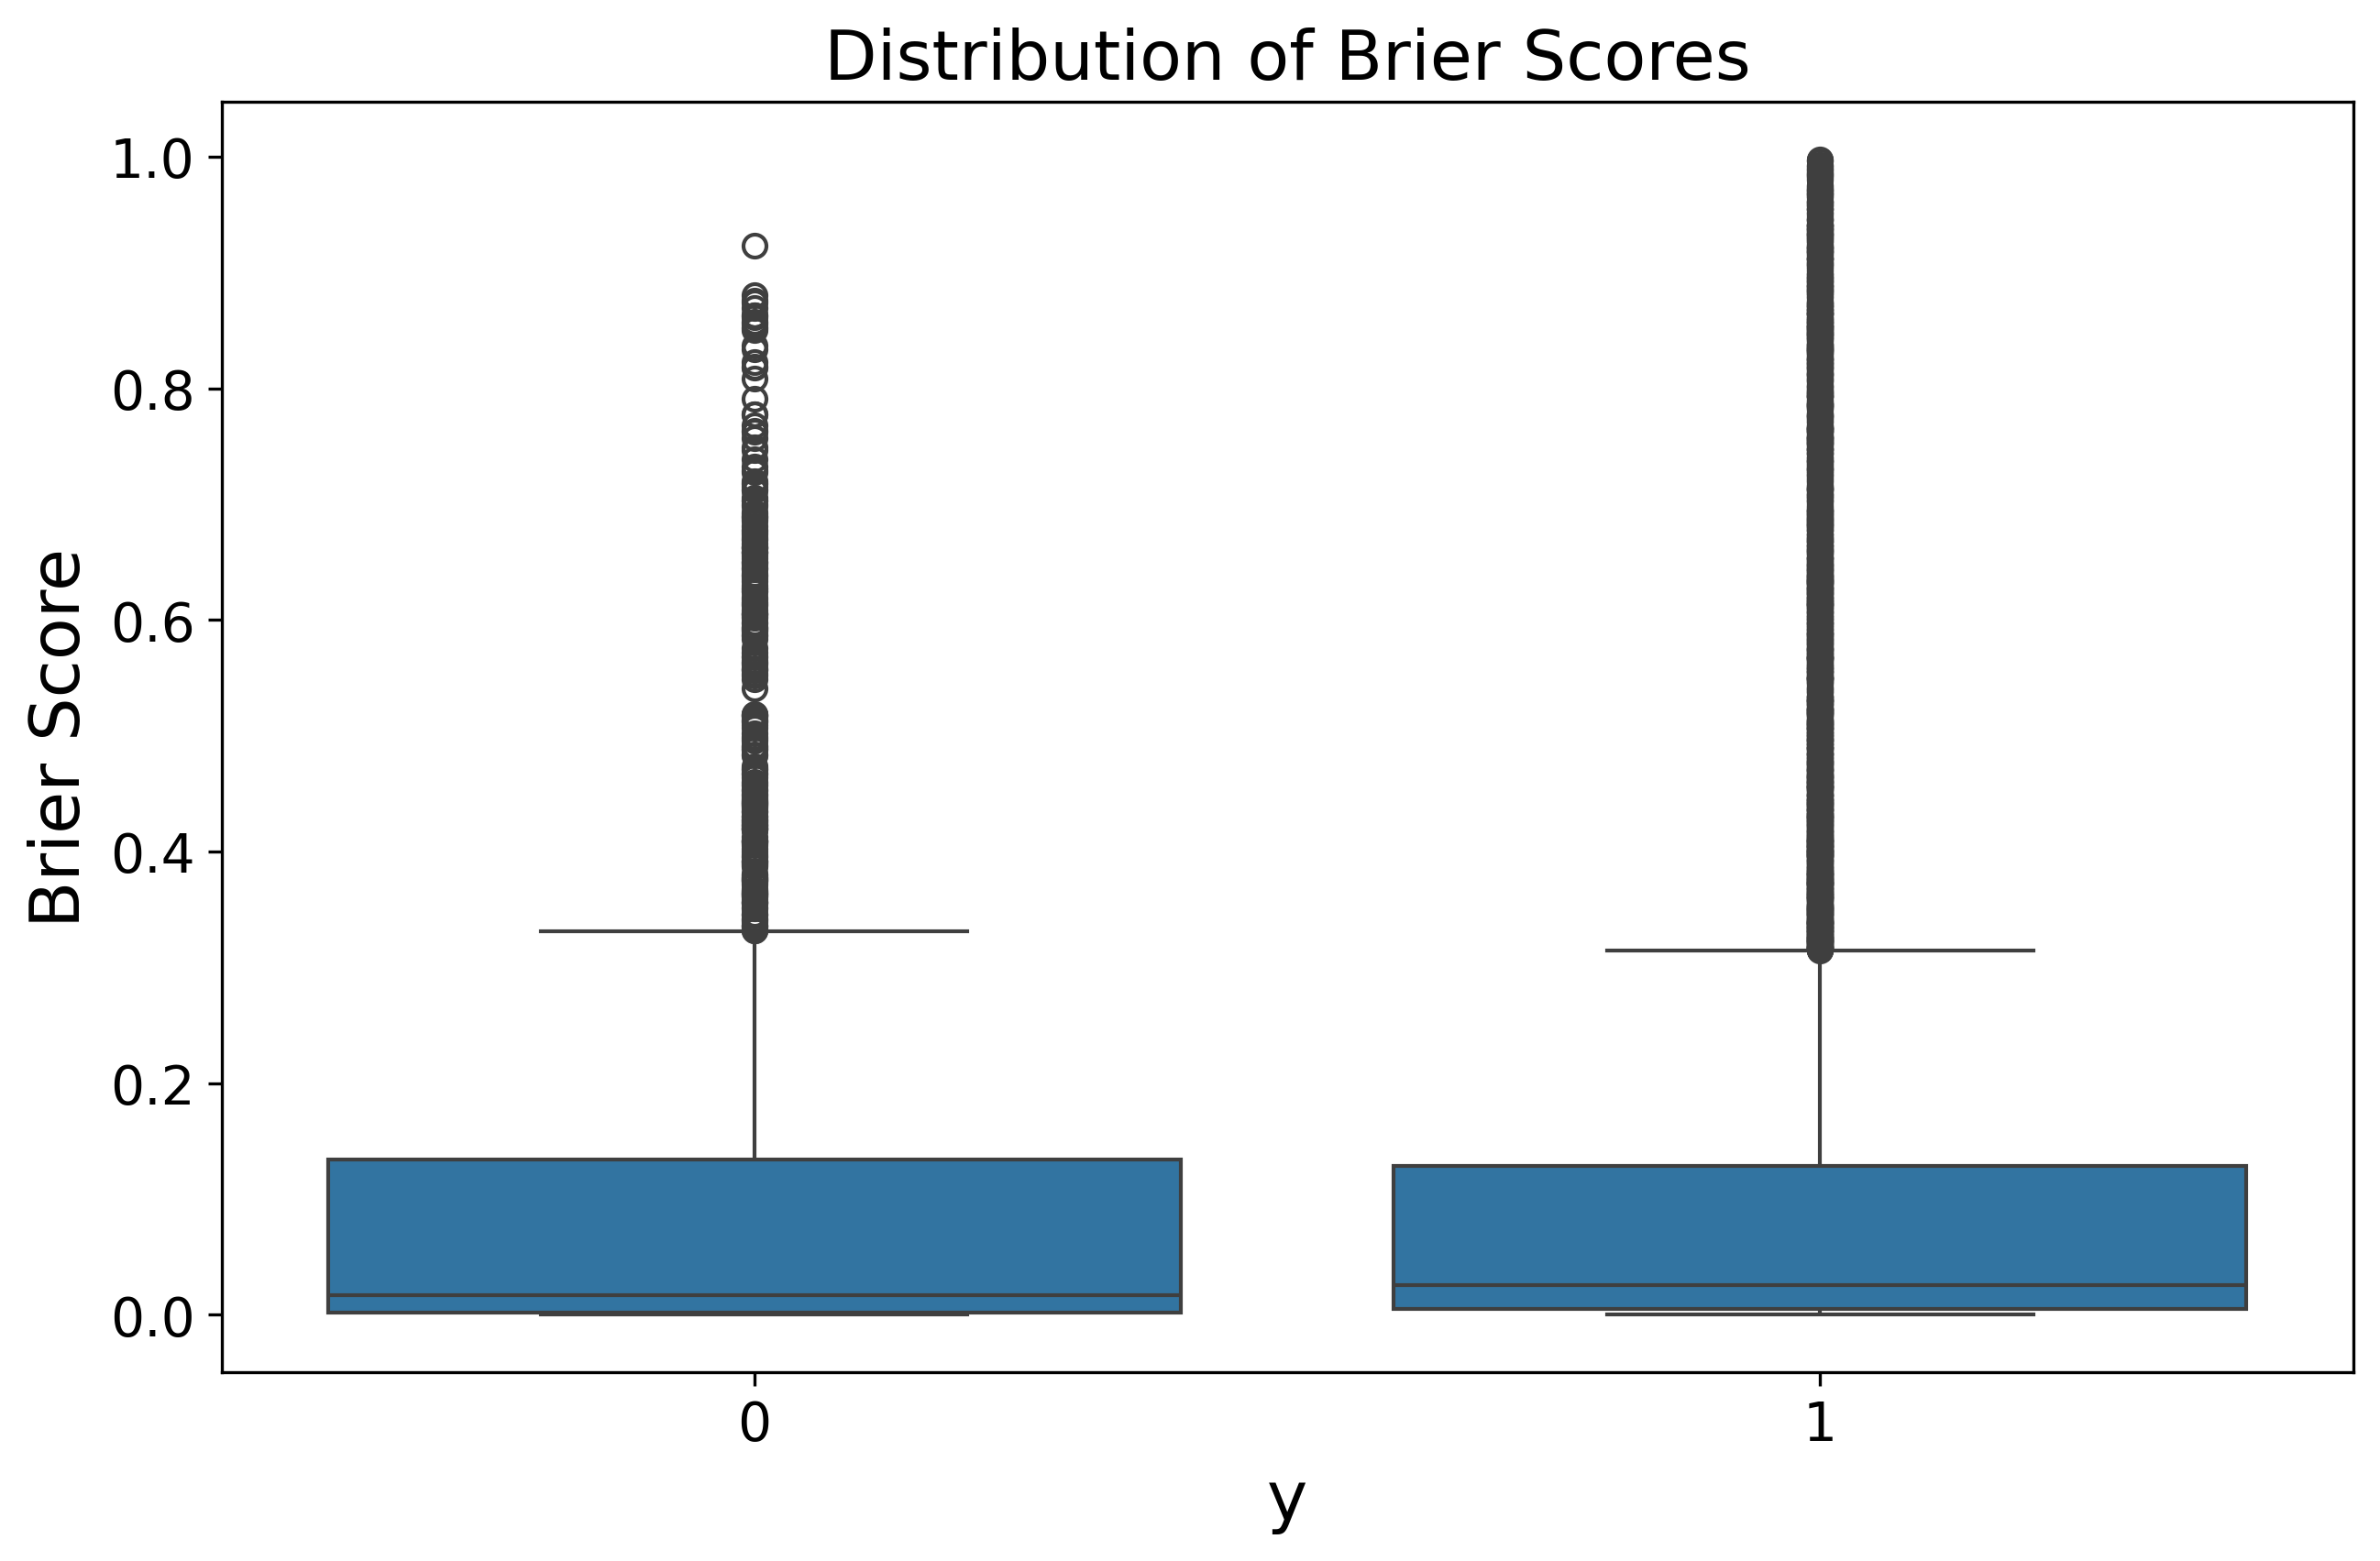


Mean Brier Score per cluster:
 Cluster
0    0.114288
1    0.178508
2    0.117181
Name: Brier_Score, dtype: float64 

Number of observations per cluster:
 Cluster
0    15315
1     2519
2     2314
Name: count, dtype: int64


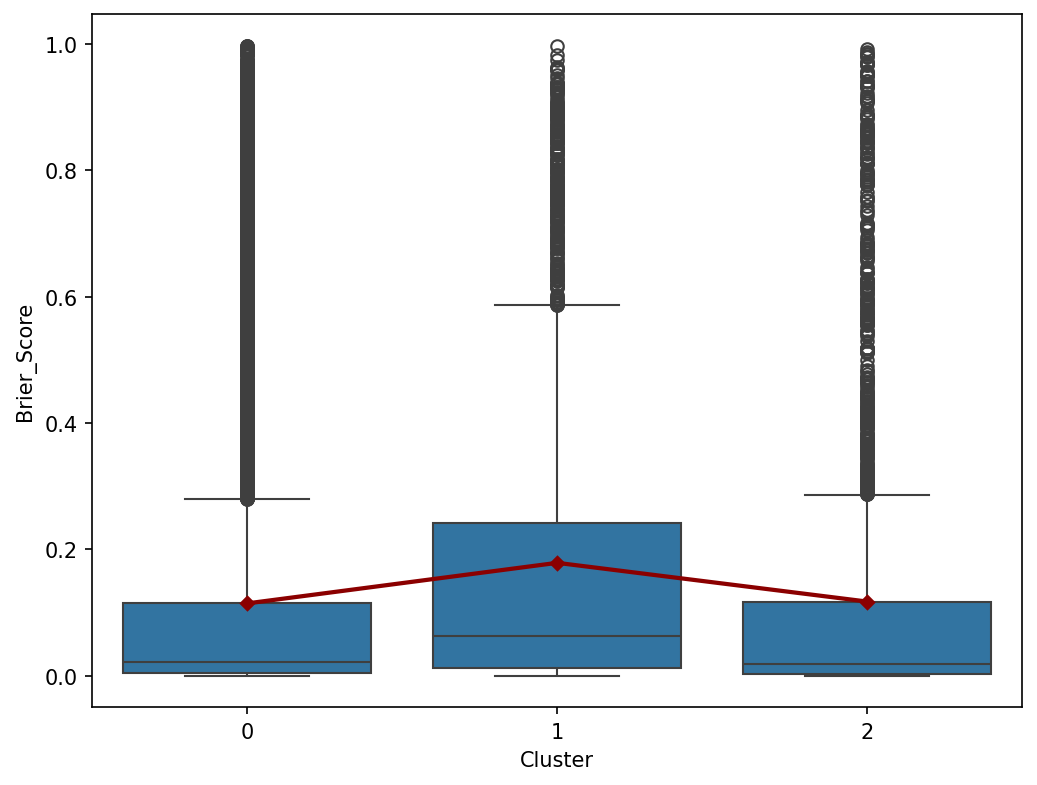

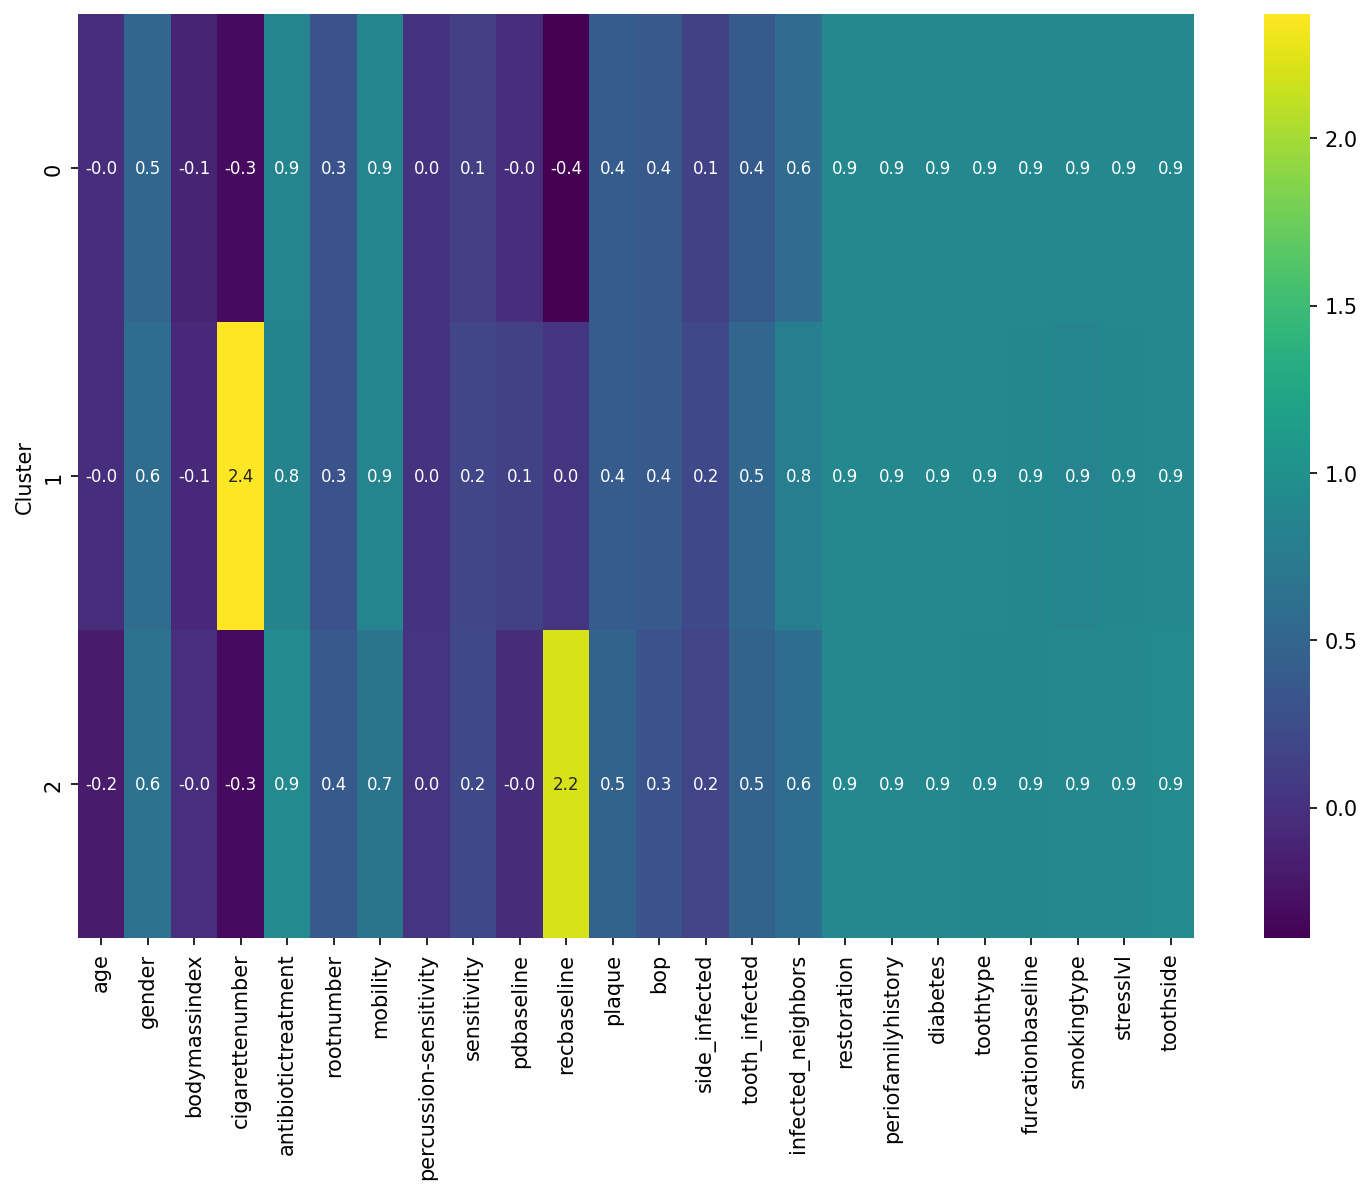

In [6]:
evaluator.wrapped_evaluation()

In [ ]:
evaluator.compare_bss(tight_layout=True)

In [ ]:
evaluator.evaluate_cluster()

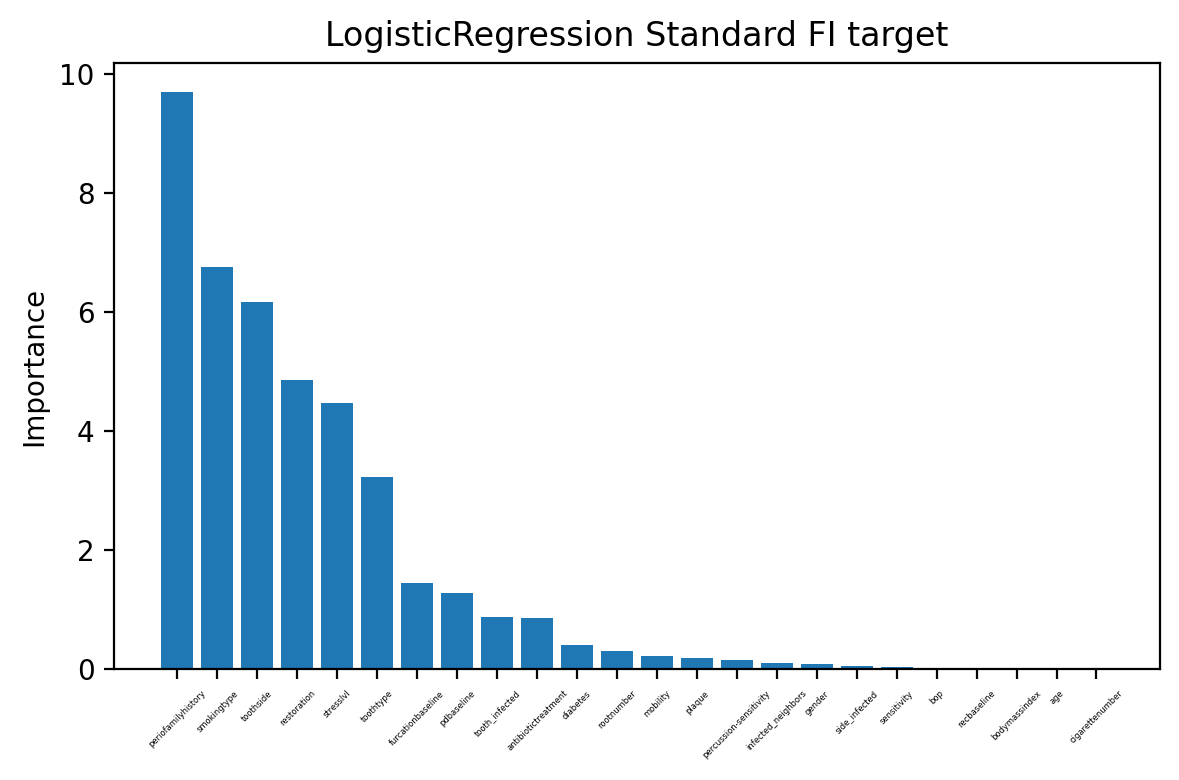

In [7]:
evaluator.evaluate_feature_importance(fi_types=["standard"])

In [8]:
patient = Patient(
    age=45,
    gender=1,
    bodymassindex=23.5,
    periofamilyhistory=1,
    diabetes=0,
    smokingtype=2,
    cigarettenumber=10,
    antibiotictreatment=0,
    stresslvl=2,
    teeth=[
        Tooth(
            tooth=11,
            toothtype=1,
            rootnumber=1,
            mobility=1,
            restoration=0,
            percussion=0,
            sensitivity=1,
            sides=[
                Side(
                    furcationbaseline=1,
                    side=1,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=5,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=6,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
        Tooth(
            tooth=18,
            toothtype=3,
            rootnumber=2,
            mobility=0,
            restoration=1,
            percussion=1,
            sensitivity=0,
            sides=[
                Side(
                    furcationbaseline=3,
                    side=1,
                    pdbaseline=4,
                    recbaseline=5,
                    plaque=2,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=5,
                    pdbaseline=5,
                    recbaseline=5,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=3,
                    side=6,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
    ],
)

_, output, results = evaluator.wrapped_patient_inference(patient=patient)  # noqa: E501
output  # noqa: E501

,tooth,side,prediction,probability
0,11,1,1,0.934479
1,11,2,1,0.900387
2,11,3,1,0.939923
3,11,4,0,0.571818
4,11,5,1,0.885270
5,11,6,1,0.896004
6,18,1,0,0.885577
7,18,2,1,0.785403
8,18,3,1,0.773619
9,18,4,0,0.772575


/opt/anaconda3/envs/pamod/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/envs/pamod/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/envs/pamod/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/envs/pamod/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/envs/pamod/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/envs/pamod/lib/python3.11/site-packages/sklea

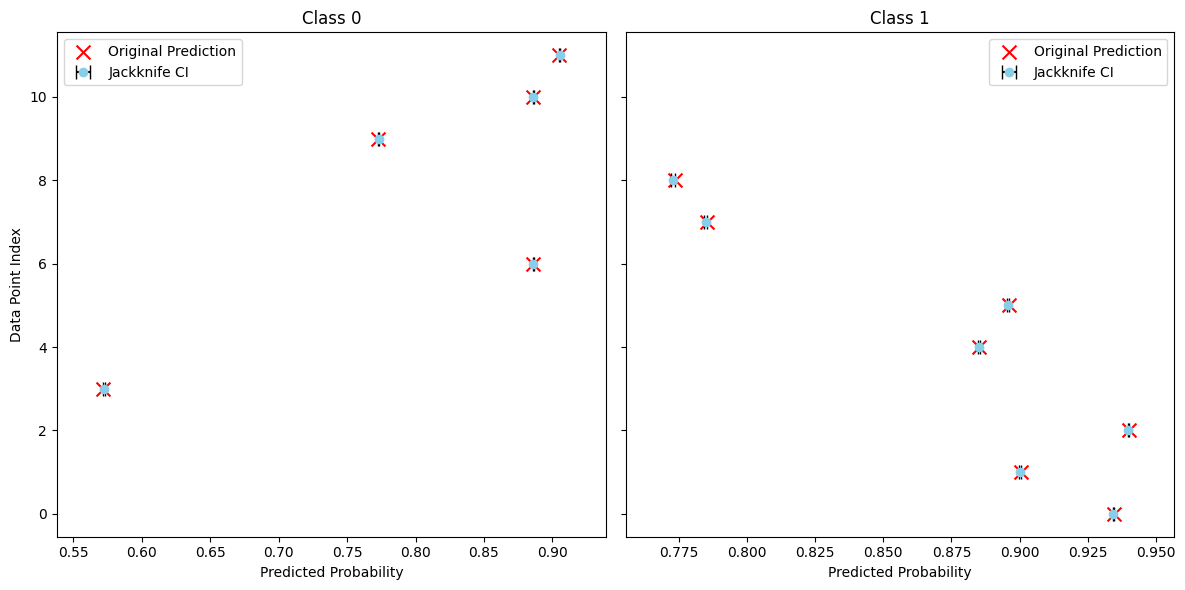

In [9]:
_, ci_plot = evaluator.wrapped_jackknife(
    patient=patient, results=results, sample_fraction=0.1
)